In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/_shared/IP_work')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
# df=pd.read_excel("allfeatures.xlsx")
df=pd.read_csv("allfeatures.csv")
print(f'shapte of feateures: {df.shape}')
print(f'total na values: {df.isna().sum().sum()}')
print(f'total null values: {df.isnull().sum().sum()}')

shapte of feateures: (7722, 1389)
total na values: 0
total null values: 0


In [ ]:
print(f'total na values: {df.isna().sum().sum()}')
print(f'total null values: {df.isnull().sum().sum()}')

total na values: 0
total null values: 0


In [ ]:
df.head()

,nAcid,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,...,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pcid,smile,class
0,0,14.560758,6,6,12,6,6,0,6,0,...,0,0,0,0,0,0,0,241,C1=CC=CC=C1,1
1,0,6.366793,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,26623,[Hg++],1
2,0,7.700379,0,0,6,3,3,0,2,0,...,0,0,0,0,0,0,0,6338,ClC=C,1
3,0,43.201516,20,24,32,20,12,0,20,0,...,0,0,0,0,0,0,0,2336,C1=CC=C2C(=C1)C=C1C=CC3=C4C(C=CC2=C14)=CC=C3,1
4,0,43.201516,20,22,32,20,12,0,20,0,...,0,0,0,0,0,0,0,9153,C1=CC=C2C(=C1)C1=CC3=CC=CC=C3C3=CC=CC2=C13,1


Accuracy: 0.750599520383693
Precision: 0.748792270531401
Recall: 0.748792270531401
F1 Score: 0.748792270531401


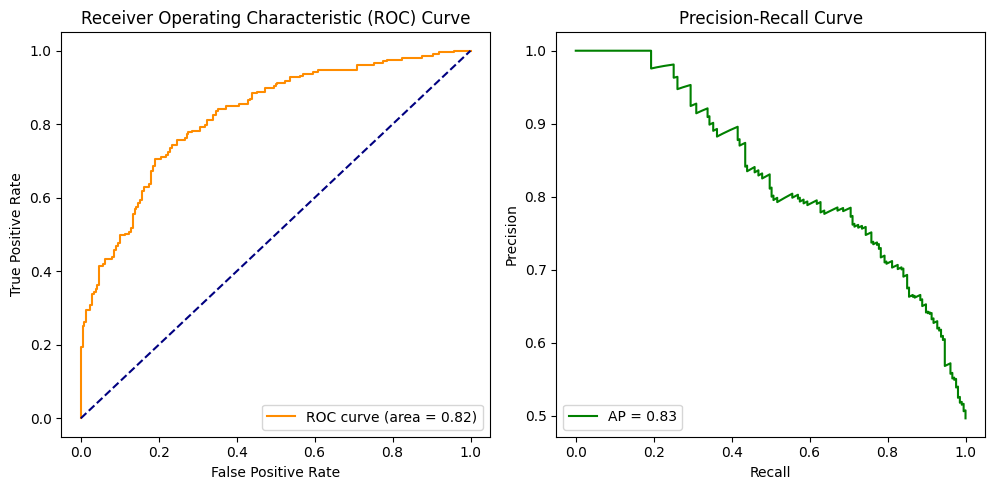

In [ ]:
#logistic regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, average_precision_score
# from sklearn.metrics import plot_confusion_matrix


X, y = make_classification(n_samples=df.shape[1], n_features=df.shape[0], n_classes=2, random_state=42)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = roc_auc_score(y_test, y_proba)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)
average_precision = average_precision_score(y_test, y_proba)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='green', label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Confusion Matrix
# plt.subplot(1, 3, 3)
# plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize=None)
# plt.title('Confusion Matrix')

plt.tight_layout()
plt.show()


In [ ]:
#gaussian naive bayes
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import StandardScaler


X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Train the model
gnb.fit(X_train_scaled, y_train)

# Make predictions
y_pred = gnb.predict(X_test_scaled)

# Calculate Accuracy and F1 score
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)  # Add average='binary' if you have multiclass labels

# Print the scores
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')

Accuracy: 0.7379
F1 Score: 0.6413


In [ ]:
#svm
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv("allfeatures.csv")

X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector

X.fillna(X.mean(), inplace=True)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize the SVM model with a linear kernel
model = SVC(kernel='linear')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8640776699029126
Confusion Matrix:
 [[715  92]
 [118 620]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87       807
           1       0.87      0.84      0.86       738

    accuracy                           0.86      1545
   macro avg       0.86      0.86      0.86      1545
weighted avg       0.86      0.86      0.86      1545



In [ ]:
#random forest classifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)

# Initialize the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8679611650485437
Confusion Matrix:
 [[718  73]
 [131 623]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       791
           1       0.90      0.83      0.86       754

    accuracy                           0.87      1545
   macro avg       0.87      0.87      0.87      1545
weighted avg       0.87      0.87      0.87      1545



Accuracy: 0.7980582524271844
Confusion Matrix:
 [[649 158]
 [154 584]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81       807
           1       0.79      0.79      0.79       738

    accuracy                           0.80      1545
   macro avg       0.80      0.80      0.80      1545
weighted avg       0.80      0.80      0.80      1545



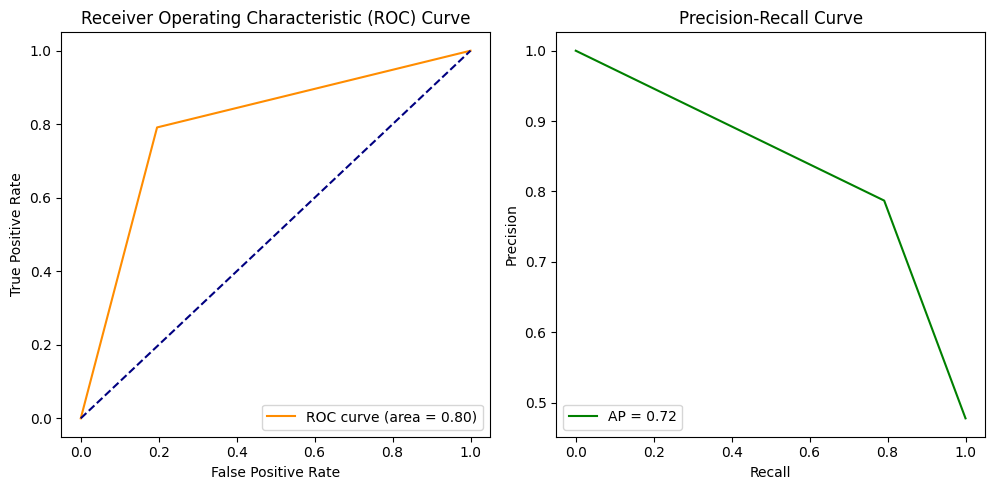

In [ ]:
#decision tree classifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='green', label=f'AP = {average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()


In [ ]:
#neural network with keras
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense



X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Neural network
model = Sequential()
model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=50, batch_size=10, verbose=0)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")

49/49 [==============================] - 0s 2ms/step - loss: 0.8032 - accuracy: 0.8673
Accuracy: 0.87


In [ ]:
#Ada boost
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
# df = pd.read_csv("allfeatures.csv")
X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the AdaBoost model
model = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8265372168284789
Confusion Matrix:
 [[677 130]
 [138 600]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83       807
           1       0.82      0.81      0.82       738

    accuracy                           0.83      1545
   macro avg       0.83      0.83      0.83      1545
weighted avg       0.83      0.83      0.83      1545



In [ ]:
#grid search
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report, f1_score, recall_score, precision_score
import pandas as pd

# Assuming df is your DataFrame and it's already loaded
X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model definition
model = LogisticRegression(solver='liblinear', random_state=42)

# Parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Setup GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='roc_auc', cv=5, verbose=1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best AUC: {:.4f}".format(grid_search.best_score_))

# Evaluate the best model
best_model = grid_search.best_estimator_
y_pred_proba = best_model.predict_proba(X_test)[:,1]

# Calculate class predictions with a default threshold of 0.5
y_pred = (y_pred_proba >= 0.5).astype(int)

# Detailed classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Individual metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)  # AUC using predicted probabilities

# Print individual metrics
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Test AUC: {auc:.4f}")



In [ ]:
#using hyperparameter tuning
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score


# Feature matrix and label vector as specified
X = df.drop(['pcid', 'class', 'smile'], axis=1)
y = df['class']

def tune_hyperparameters(X, y):
    # Define the XGBoost classifier model
    model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss', random_state=42)

    # Define the parameter grid to search
    params = {
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 200, 300, 400],
        'colsample_bytree': [0.5, 0.7, 0.9, 1],
        'subsample': [0.5, 0.7, 0.9, 1],
        'gamma': [0, 0.1, 0.2, 0.3]
    }

    # Setup GridSearchCV to find the best hyperparameters
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='roc_auc', cv=5, verbose=1)

    # Fit GridSearchCV on the provided training data
    grid_search.fit(X, y)

    # Output the best parameters and the best AUC score achieved
    print("Best parameters:", grid_search.best_params_)
    print("Best AUC: {:.4f}".format(grid_search.best_score_))

    # Return the model with the best parameters
    return grid_search.best_estimator_

# Call the function with your dataset
best_model = tune_hyperparameters(X, y)




In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler


X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for better performance of KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Creating a KNN model
knn = KNeighborsClassifier()

# Using GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluating the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("Classification Report:\n", classification_report(y_test, y_pred))

Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.84
Test set accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1211
           1       0.86      0.81      0.84      1106

    accuracy                           0.85      2317
   macro avg       0.85      0.85      0.85      2317
weighted avg       0.85      0.85      0.85      2317



In [ ]:
df

,nAcid,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,...,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pcid,smile,class
0,0,14.560758,6,6,12,6,6,0,6,0,...,0,0,0,0,0,0,0,241,C1=CC=CC=C1,1
1,0,6.366793,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,26623,[Hg++],1
2,0,7.700379,0,0,6,3,3,0,2,0,...,0,0,0,0,0,0,0,6338,ClC=C,1
3,0,43.201516,20,24,32,20,12,0,20,0,...,0,0,0,0,0,0,0,2336,C1=CC=C2C(=C1)C=C1C=CC3=C4C(C=CC2=C14)=CC=C3,1
4,0,43.201516,20,22,32,20,12,0,20,0,...,0,0,0,0,0,0,0,9153,C1=CC=C2C(=C1)C1=CC3=CC=CC=C3C3=CC=CC2=C13,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7717,1,56.225376,0,0,54,22,32,0,18,0,...,0,0,0,0,0,0,0,5281026,CCCCCC=CC(C=CCCCCCCCC(=O)O)OO,0
7718,2,72.629755,0,0,66,31,35,0,23,1,...,0,0,0,0,0,0,0,53481512,C(CCC=O)CC=CCC=CC=CC=CC(C(CCCC(=O)O)O)SCC(C(=O...,0
7719,3,73.431755,0,0,67,32,35,0,23,1,...,0,0,0,0,0,0,0,53481508,C(CCC(=O)O)CC=CCC=CC=CC=CC(C(CCCC(=O)O)O)SCC(C...,0
7720,3,67.244583,0,0,61,30,31,0,21,1,...,0,0,0,0,0,0,0,53481489,C(CC(C(C=CC=CC=CCC=CCCC(=O)O)SCC(C(=O)O)N)O)CC...,0


In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler



# X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
X = featureseldf
y = df['class']  # label vector

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling for better performance of KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Setting the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Creating a KNN model
knn = KNeighborsClassifier()

# Using GridSearchCV to find the best parameters
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluating the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_scaled)

# Accuracy
print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))

# Classification Report (includes F1 score, precision, and recall)
print("Classification Report:\n", classification_report(y_test, y_pred))


if len(y.unique()) == 2:
    # Convert to probability scores if y is binary
    y_proba = best_model.predict_proba(X_test_scaled)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print("ROC AUC Score:", auc)
else:
    print("ROC AUC Score is not computed because the target class is not binary.")


Best parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best cross-validation score: 0.83
Test set accuracy: 0.85
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      1211
           1       0.87      0.80      0.83      1106

    accuracy                           0.85      2317
   macro avg       0.85      0.84      0.84      2317
weighted avg       0.85      0.85      0.84      2317

ROC AUC Score: 0.8967533892901568


In [ ]:
featureseldf = pd.read_csv('featureselection.csv', header=None)
featuresdf = pd.read_csv('featureselection500.csv', header=None)

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler
import numpy as np

# Assuming df is your DataFrame and it's already loaded
# X = df.drop(['pcid', 'class', 'smile'], axis=1)  # feature matrix
X = df.drop(['pcid', 'class', 'smile'], axis=1)
y = df['class']  # label vector

# Feature scaling for better performance of KNN
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Number of folds
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=3, weights='uniform', metric='manhattan')

# Lists to store scores for each fold
auc_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

# Perform k-fold cross-validation
for train_index, test_index in kf.split(X_scaled):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Train the model
    knn.fit(X_train, y_train)

    # Predict probabilities for AUC calculation
    y_proba = knn.predict_proba(X_test)[:, 1]

    # Predict class labels for other metrics
    y_pred = knn.predict(X_test)

    # Calculate scores
    auc = roc_auc_score(y_test, y_proba)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)

    # Append scores
    auc_scores.append(auc)
    f1_scores.append(f1)
    precision_scores.append(precision)
    recall_scores.append(recall)
    accuracy_scores.append(acc)

# Print average scores across all folds
print("Average ROC AUC Score:", np.mean(auc_scores))
print("Average F1 Score:", np.mean(f1_scores))
print("Average Precision Score:", np.mean(precision_scores))
print("Average Recall Score:", np.mean(recall_scores))
print("Average Accuracy Score:", np.mean(accuracy_scores))

# for 500 features
# Average ROC AUC Score: 0.8902184813600487
# Average F1 Score: 0.8111753830474623
# Average Precision Score: 0.8531632100015365
# Average Recall Score: 0.7732749557992318
# Average Accuracy Score: 0.8313913342388114

# for 250 features
# Average ROC AUC Score: 0.8964293370889944
# Average F1 Score: 0.8244388847084039
# Average Precision Score: 0.8608083530685322
# Average Recall Score: 0.7912350614450334
# Average Accuracy Score: 0.8422674681825042

Average ROC AUC Score: 0.9073628298461479
Average F1 Score: 0.8353788386082716
Average Precision Score: 0.8618005298936264
Average Recall Score: 0.8107938773043892
Average Accuracy Score: 0.8504267484950617


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and it's already loaded
X = df.drop(['class', 'pcid', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector (binary)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for XGBoost which is not necessary but included for completeness
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create the parameter grid
param_grid = {
    'max_depth': [3, 7],
    'min_child_weight': [5],
    'learning_rate': [0.2],
    'n_estimators': [300]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Predicting the test set results
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculating the evaluation metrics
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing the metrics
print(f"ROC AUC Score: {auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best parameters: {'learning_rate': 0.2, 'max_depth': 7, 'min_child_weight': 5, 'n_estimators': 300}
Best cross-validation score: 0.86
ROC AUC Score: 0.95
F1 Score: 0.87
Precision: 0.87
Recall: 0.87
Accuracy: 0.87
